<a href="https://colab.research.google.com/github/jot1s/github-try/blob/main/Copy_of_LilEI_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report

import torch
import torch.nn as nn
from torch.autograd import Function
from torch.autograd import Variable
import torch.utils.data as data_utils
import seaborn as sns
import pandas as pd
import torch.nn.functional as F
import numpy as np
from sklearn.model_selection import train_test_split
from torch import optim
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import sklearn
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold

seed = 7
np.random.seed(seed)


dataload 2 是血肿扩大； dataload 1 是血肿未扩大。
wide deep learning:
wide part is about some direct influence aspects: like gender, MPV (some constant variables)

deep part is: compare different parameter, joint these variables for analysis
************
feature programming is based on MSE and also some other feature selections.

In [ ]:
  def dataload1():
      return pd.read_excel('/content/drive/MyDrive/Tuebingen /lilei/lilei.xlsx','血肿未扩大组')



  # def remove_space_columns(data):
  #     temp={}
  #     for i in data:
  #         temp[i]=i.replace(' ','_')
  #     #print(temp)
  #     return temp

  data1=dataload1()
  data1.head()


,患者编号,性别,年龄(year),入院GCS,入院SBP(mmHg),入院DBP(mmHg),吸烟史,饮酒史,既往脑梗死,既往脑出血,...,RBC(x1012/L),Hb(g/L),PLT(x109/L),MPV(fL),RDW-SD(fL),HDL(mmol/L),PT(s),APTT(s),INR,初次空腹血糖(mmol/L)
0,1.0,1,55.0,15.0,144.0,92.0,0,0.0,0.0,0.0,...,4.78,147.0,272.0,7.6,41.2,1.52,10.6,24.3,0.92,9.9
1,2.0,1,71.0,15.0,138.0,71.0,0,0.0,0.0,0.0,...,3.86,142.0,198.0,8.3,61.6,1.05,13.4,26.7,1.06,7.3
2,3.0,1,49.0,13.0,188.0,110.0,0,0.0,0.0,0.0,...,5.20,160.0,240.0,11.6,40.6,1.45,11.6,25.6,1.00,7.9
3,4.0,0,47.0,13.0,165.0,85.0,0,0.0,0.0,0.0,...,4.22,121.0,204.0,10.4,40.1,0.98,13.9,29.3,1.11,7.6
4,5.0,0,100.0,6.0,168.0,112.0,0,0.0,0.0,0.0,...,2.97,95.0,89.0,13.1,43.0,1.00,10.9,23.1,0.94,7.0


In [ ]:
  def dataload2():
      return pd.read_excel('/content/drive/MyDrive/Tuebingen /lilei/lilei.xlsx','血肿扩大组')



  # def remove_space_columns(data):
  #     temp={}
  #     for i in data:
  #         temp[i]=i.replace(' ','_')
  #     #print(temp)
  #     return temp

  data2=dataload2()
  data2.head()

,患者编号,性别,年龄(year),入院GCS,入院SBP(mmHg),入院DBP(mmHg),吸烟史,饮酒史,既往脑梗死,既往脑出血,...,RBC(x1012/L),Hb(g/L),PLT(x109/L),MPV(fL),RDW-SD(fL),HDL(mmol/L),PT(s),APTT(s),INR,初次空腹血糖(mmol/L)
0,1.0,1,18.0,14.0,104.0,66.0,1,1.0,0.0,0.0,...,4.22,131.0,250.0,8.4,43.3,1.17,11.5,28.6,1.00,6.9
1,2.0,0,67.0,15.0,179.0,101.0,0,0.0,0.0,0.0,...,4.28,122.0,117.0,10.7,43.6,0.81,12.2,27.4,1.07,10.2
2,3.0,1,56.0,13.0,181.0,117.0,1,1.0,0.0,0.0,...,4.68,149.0,160.0,10.0,41.6,0.88,12.9,30.7,0.97,6.6
3,4.0,0,84.0,14.0,192.0,101.0,0,0.0,0.0,0.0,...,4.36,131.0,158.0,8.8,40.3,1.87,10.4,24.8,0.89,6.9
4,5.0,1,85.0,15.0,177.0,100.0,0,0.0,0.0,0.0,...,4.45,136.0,167.0,10.5,46.6,1.84,12.4,24.3,0.91,6.5


In [ ]:
# data2.rename(columns=remove_space_columns(data.columns),inplace=True)
# data2.describe()

In [ ]:
data1_final=data1[0:338]
data1_final

data2_final=data2[0:91]
data2_final

,患者编号,性别,年龄(year),入院GCS,入院SBP(mmHg),入院DBP(mmHg),吸烟史,饮酒史,既往脑梗死,既往脑出血,...,RBC(x1012/L),Hb(g/L),PLT(x109/L),MPV(fL),RDW-SD(fL),HDL(mmol/L),PT(s),APTT(s),INR,初次空腹血糖(mmol/L)
0,1.0,1,18.0,14.0,104.0,66.0,1,1.0,0.0,0.0,...,4.22,131.0,250.0,8.4,43.3,1.17,11.5,28.6,1.00,6.9
1,2.0,0,67.0,15.0,179.0,101.0,0,0.0,0.0,0.0,...,4.28,122.0,117.0,10.7,43.6,0.81,12.2,27.4,1.07,10.2
2,3.0,1,56.0,13.0,181.0,117.0,1,1.0,0.0,0.0,...,4.68,149.0,160.0,10.0,41.6,0.88,12.9,30.7,0.97,6.6
3,4.0,0,84.0,14.0,192.0,101.0,0,0.0,0.0,0.0,...,4.36,131.0,158.0,8.8,40.3,1.87,10.4,24.8,0.89,6.9
4,5.0,1,85.0,15.0,177.0,100.0,0,0.0,0.0,0.0,...,4.45,136.0,167.0,10.5,46.6,1.84,12.4,24.3,0.91,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,87.0,1,54.0,14.0,121.0,68.0,1,1.0,0.0,0.0,...,4.80,153.0,197.0,10.4,41.6,0.93,10.2,23.9,0.92,6.7
87,88.0,1,78.0,10.0,145.0,78.0,0,0.0,0.0,0.0,...,4.31,123.0,207.0,9.9,47.5,2.20,12.4,26.3,1.13,7.9
88,89.0,1,71.0,12.0,121.0,74.0,0,0.0,0.0,0.0,...,3.97,148.0,270.0,10.5,57.5,0.99,11.5,27.8,1.05,3.4
89,90.0,1,66.0,15.0,150.0,104.0,0,0.0,0.0,0.0,...,5.68,175.0,281.0,10.6,44.8,1.57,11.2,27.6,1.02,5.9


In [ ]:
data1_final['label']=0
data1_final




<ipython-input-9-4ba0df7aa37d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_final['label']=0


,患者编号,性别,年龄(year),入院GCS,入院SBP(mmHg),入院DBP(mmHg),吸烟史,饮酒史,既往脑梗死,既往脑出血,...,Hb(g/L),PLT(x109/L),MPV(fL),RDW-SD(fL),HDL(mmol/L),PT(s),APTT(s),INR,初次空腹血糖(mmol/L),label
0,1.0,1,55.0,15.0,144.0,92.0,0,0.0,0.0,0.0,...,147.0,272.0,7.6,41.2,1.52,10.6,24.3,0.92,9.9,0
1,2.0,1,71.0,15.0,138.0,71.0,0,0.0,0.0,0.0,...,142.0,198.0,8.3,61.6,1.05,13.4,26.7,1.06,7.3,0
2,3.0,1,49.0,13.0,188.0,110.0,0,0.0,0.0,0.0,...,160.0,240.0,11.6,40.6,1.45,11.6,25.6,1.00,7.9,0
3,4.0,0,47.0,13.0,165.0,85.0,0,0.0,0.0,0.0,...,121.0,204.0,10.4,40.1,0.98,13.9,29.3,1.11,7.6,0
4,5.0,0,100.0,6.0,168.0,112.0,0,0.0,0.0,0.0,...,95.0,89.0,13.1,43.0,1.00,10.9,23.1,0.94,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,334.0,1,70.0,15.0,135.0,86.0,0,0.0,0.0,0.0,...,151.0,174.0,10.9,43.0,1.19,13.2,32.2,0.98,7.7,0
334,335.0,0,90.0,10.0,104.0,72.0,0,1.0,0.0,0.0,...,130.0,197.0,10.6,44.2,1.95,12.7,34.1,0.94,7.3,0
335,336.0,0,55.0,14.0,149.0,86.0,0,0.0,0.0,1.0,...,139.0,297.0,10.3,41.2,1.44,13.7,30.3,1.03,7.7,0
336,337.0,1,72.0,15.0,119.0,72.0,0,0.0,0.0,0.0,...,164.0,164.0,11.9,42.5,1.63,10.8,25.6,0.98,7.0,0


In [ ]:
data2_final['label']=1
data2_final

<ipython-input-10-c20741d5c121>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_final['label']=1


,患者编号,性别,年龄(year),入院GCS,入院SBP(mmHg),入院DBP(mmHg),吸烟史,饮酒史,既往脑梗死,既往脑出血,...,Hb(g/L),PLT(x109/L),MPV(fL),RDW-SD(fL),HDL(mmol/L),PT(s),APTT(s),INR,初次空腹血糖(mmol/L),label
0,1.0,1,18.0,14.0,104.0,66.0,1,1.0,0.0,0.0,...,131.0,250.0,8.4,43.3,1.17,11.5,28.6,1.00,6.9,1
1,2.0,0,67.0,15.0,179.0,101.0,0,0.0,0.0,0.0,...,122.0,117.0,10.7,43.6,0.81,12.2,27.4,1.07,10.2,1
2,3.0,1,56.0,13.0,181.0,117.0,1,1.0,0.0,0.0,...,149.0,160.0,10.0,41.6,0.88,12.9,30.7,0.97,6.6,1
3,4.0,0,84.0,14.0,192.0,101.0,0,0.0,0.0,0.0,...,131.0,158.0,8.8,40.3,1.87,10.4,24.8,0.89,6.9,1
4,5.0,1,85.0,15.0,177.0,100.0,0,0.0,0.0,0.0,...,136.0,167.0,10.5,46.6,1.84,12.4,24.3,0.91,6.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,87.0,1,54.0,14.0,121.0,68.0,1,1.0,0.0,0.0,...,153.0,197.0,10.4,41.6,0.93,10.2,23.9,0.92,6.7,1
87,88.0,1,78.0,10.0,145.0,78.0,0,0.0,0.0,0.0,...,123.0,207.0,9.9,47.5,2.20,12.4,26.3,1.13,7.9,1
88,89.0,1,71.0,12.0,121.0,74.0,0,0.0,0.0,0.0,...,148.0,270.0,10.5,57.5,0.99,11.5,27.8,1.05,3.4,1
89,90.0,1,66.0,15.0,150.0,104.0,0,0.0,0.0,0.0,...,175.0,281.0,10.6,44.8,1.57,11.2,27.6,1.02,5.9,1


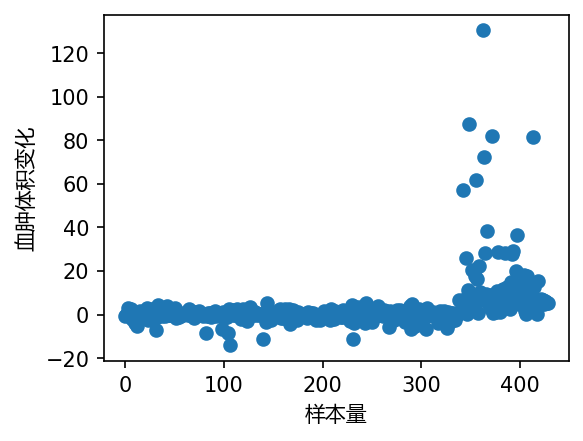

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

font_path = '/content/msyh.ttc'  # the location of the font file
my_font = fm.FontProperties(fname=font_path)  # get the font based on the font_path
plt.figure(figsize=(4,3), dpi=150)
data_final=pd.concat([data1_final, data2_final],ignore_index=True)
data_final['ml_Change']=data_final['复查血肿体积(ml)']-data_final['首次血肿体积(ml)']
plt.scatter(np.arange(0,len(data_final['ml_Change']),1)  ,data_final['ml_Change'])
plt.xlabel('样本量',fontproperties=my_font)
plt.ylabel('血肿体积变化',fontproperties=my_font)
data_final['ml_Change'][90:120]

data_final.to_excel('test.xlsx', sheet_name='sheet1', index=False)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 24739 (\N{CJK UNIFIED IDEOGRAPH-60A3}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 32534 (\N{CJK UNIFIED IDEOGRAPH-7F16}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 40836 (\N{CJK UNIFIED IDEOGRAPH-9F84}) missing from current font.
  fig.canvas.draw()
/usr

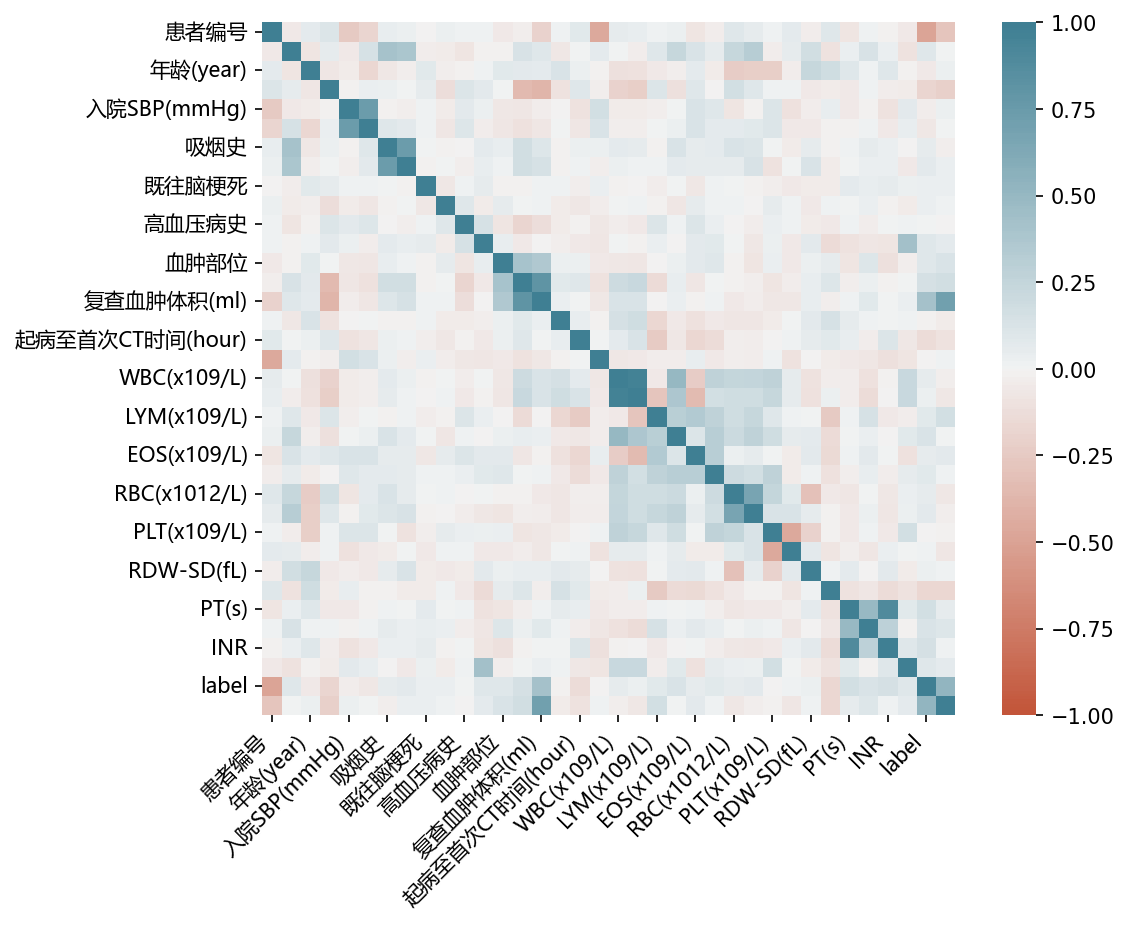

In [ ]:
# # data.Pathology.replace([1],0,inplace=True)
# # # data.Pathology.replace([2,3],2,inplace=True)
# bytes.decode('utf-8')
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font_path = '/content/msyh.ttc'  # the location of the font file
my_font = fm.FontProperties(fname=font_path)  # get the font based on the font_path


corr = data_final.corr()
plt.figure(figsize=(8,6), dpi=150)
# fig=plt.subplot((data.columns,data.columns))
ax=sns.heatmap(corr,vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontproperties=my_font


);

ax.set_yticklabels(
    ax.get_xticklabels(),
    fontproperties=my_font


);

# plt.savefig('corr.png')

In [ ]:
label1=data_final['label']
label2=data_final['ml_Change']
data_final.pop('label')
data_final.pop('ml_Change')
data_final.pop('复查血肿体积(ml)')
# data_final.pop('首次血肿体积(ml)')
data_final



,患者编号,性别,年龄(year),入院GCS,入院SBP(mmHg),入院DBP(mmHg),吸烟史,饮酒史,既往脑梗死,既往脑出血,...,RBC(x1012/L),Hb(g/L),PLT(x109/L),MPV(fL),RDW-SD(fL),HDL(mmol/L),PT(s),APTT(s),INR,初次空腹血糖(mmol/L)
0,1.0,1,55.0,15.0,144.0,92.0,0,0.0,0.0,0.0,...,4.78,147.0,272.0,7.6,41.2,1.52,10.6,24.3,0.92,9.9
1,2.0,1,71.0,15.0,138.0,71.0,0,0.0,0.0,0.0,...,3.86,142.0,198.0,8.3,61.6,1.05,13.4,26.7,1.06,7.3
2,3.0,1,49.0,13.0,188.0,110.0,0,0.0,0.0,0.0,...,5.20,160.0,240.0,11.6,40.6,1.45,11.6,25.6,1.00,7.9
3,4.0,0,47.0,13.0,165.0,85.0,0,0.0,0.0,0.0,...,4.22,121.0,204.0,10.4,40.1,0.98,13.9,29.3,1.11,7.6
4,5.0,0,100.0,6.0,168.0,112.0,0,0.0,0.0,0.0,...,2.97,95.0,89.0,13.1,43.0,1.00,10.9,23.1,0.94,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,87.0,1,54.0,14.0,121.0,68.0,1,1.0,0.0,0.0,...,4.80,153.0,197.0,10.4,41.6,0.93,10.2,23.9,0.92,6.7
425,88.0,1,78.0,10.0,145.0,78.0,0,0.0,0.0,0.0,...,4.31,123.0,207.0,9.9,47.5,2.20,12.4,26.3,1.13,7.9
426,89.0,1,71.0,12.0,121.0,74.0,0,0.0,0.0,0.0,...,3.97,148.0,270.0,10.5,57.5,0.99,11.5,27.8,1.05,3.4
427,90.0,1,66.0,15.0,150.0,104.0,0,0.0,0.0,0.0,...,5.68,175.0,281.0,10.6,44.8,1.57,11.2,27.6,1.02,5.9


Iteration 1, loss = 6.36973217
Iteration 2, loss = 3.68841126
Iteration 3, loss = 3.61761418
Iteration 4, loss = 1.72421928
Iteration 5, loss = 1.17445924
Iteration 6, loss = 2.20840146
Iteration 7, loss = 1.03957406
Iteration 8, loss = 1.09202658
Iteration 9, loss = 1.39435450
Iteration 10, loss = 0.84947644
Iteration 11, loss = 0.81772982
Iteration 12, loss = 1.04646004
Iteration 13, loss = 0.65794918
Iteration 14, loss = 0.65067272
Iteration 15, loss = 0.65490943
Iteration 16, loss = 0.43770707
Iteration 17, loss = 0.51900805
Iteration 18, loss = 0.37663729
Iteration 19, loss = 0.37769707
Iteration 20, loss = 0.32412600
Iteration 21, loss = 0.31489423
Iteration 22, loss = 0.31015836
Iteration 23, loss = 0.29444375
Iteration 24, loss = 0.26099766
Iteration 25, loss = 0.29182480
Iteration 26, loss = 0.26648883
Iteration 27, loss = 0.27502306
Iteration 28, loss = 0.27460990
Iteration 29, loss = 0.26884577
Iteration 30, loss = 0.25168159
Iteration 31, loss = 0.24000476
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


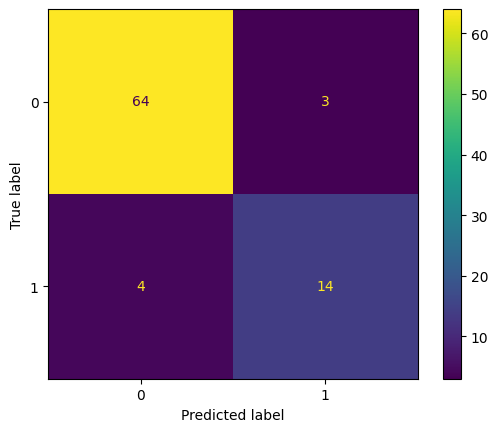

Confusion matrix:
[[64  3]
 [ 4 14]]


[array([[64,  4],
        [10,  8]]),
 array([[64,  4],
        [10,  8]]),
 array([[62,  6],
        [ 4, 14]]),
 array([[59,  8],
        [ 7, 12]]),
 array([[64,  3],
        [ 4, 14]])]

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
# from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit,cross_val_score,cross_val_predict,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC


from sklearn.tree import DecisionTreeClassifier


lda=LinearDiscriminantAnalysis()
svc=SVC(probability=True)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=25)

from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(1024,32), activation='relu', solver='adam', alpha=0.001, batch_size='auto',max_iter=1510)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

from sklearn.naive_bayes import MultinomialNB
mnb= MultinomialNB()

from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()

from sklearn.neighbors import NearestNeighbors

knn=NearestNeighbors()

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4)


from itertools import product
from sklearn.ensemble import VotingClassifier

from sklearn.cluster import KMeans

km=KMeans(n_clusters=3)

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=100)

from sklearn.ensemble import VotingClassifier

# from numpy.random import seed
# seed(1)

# from tensorflow import set_random_seed
# set_random_seed(2)
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# trainf=trainnoage
# trainf=datanocon
# trainf=trainnoload
# trainf=newtrain
trainf=data_final.to_numpy()
# trainf=datamult
# trainf=trainnoload
# trainf=dataallload
label=label1
from sklearn.metrics import confusion_matrix,classification_report

regr = linear_model.LinearRegression()

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=25)

clf1 = SVC(kernel='rbf', probability=True)
clf2 = LinearDiscriminantAnalysis()
clf3 = AdaBoostClassifier(n_estimators=100)
clf4=DecisionTreeClassifier()
clf5=MLPClassifier(hidden_layer_sizes=(512), activation='relu', solver='adam', alpha=0.0001, batch_size=200,max_iter=300,verbose=True)
clf6=rf


# cv=ShuffleSplit(n_splits=3)
# cv_split=cv.split(trainf)
clfs=clf5

kfold = StratifiedKFold(n_splits=5, shuffle=True)

score_this_window_matrix = []
score_this_window_clfs = []
for train_idx, test_idx in  kfold.split(trainf, label):
    y_train, y_test = label[train_idx], label[test_idx]
    X_train = trainf[train_idx]
    X_test = trainf[test_idx]


    clfs.fit(X_train, y_train)

    score_this_window_clfs.append(clfs.score(X_test, y_test))

    y_pred=clfs.predict(X_test)
    y_true=label[test_idx]

    score_this_window_matrix.append(confusion_matrix(y_true, y_pred))


#    print("Coefficients: \n", regr.coef_)
# # The mean squared error
#   print("Mean squared error: %.2f" % mean_squared_error(y_test,LR_y_pred))

print("Classification report for classifier %s:\n%s\n"
       % (clfs, classification_report(y_true, y_pred)))

disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred))
# Then just plot it:
disp.plot()
# And show it:
plt.show()
print("Confusion matrix:\n%s" % confusion_matrix(y_true, y_pred))
# np.mean(score_this_window_matrix,axis=0)
score_this_window_clfs
score_this_window_matrix




In [ ]:
data_final

,患者编号,性别,年龄(year),入院GCS,入院SBP(mmHg),入院DBP(mmHg),吸烟史,饮酒史,既往脑梗死,既往脑出血,...,RBC(x1012/L),Hb(g/L),PLT(x109/L),MPV(fL),RDW-SD(fL),HDL(mmol/L),PT(s),APTT(s),INR,初次空腹血糖(mmol/L)
0,1.0,1,55.0,15.0,144.0,92.0,0,0.0,0.0,0.0,...,4.78,147.0,272.0,7.6,41.2,1.52,10.6,24.3,0.92,9.9
1,2.0,1,71.0,15.0,138.0,71.0,0,0.0,0.0,0.0,...,3.86,142.0,198.0,8.3,61.6,1.05,13.4,26.7,1.06,7.3
2,3.0,1,49.0,13.0,188.0,110.0,0,0.0,0.0,0.0,...,5.20,160.0,240.0,11.6,40.6,1.45,11.6,25.6,1.00,7.9
3,4.0,0,47.0,13.0,165.0,85.0,0,0.0,0.0,0.0,...,4.22,121.0,204.0,10.4,40.1,0.98,13.9,29.3,1.11,7.6
4,5.0,0,100.0,6.0,168.0,112.0,0,0.0,0.0,0.0,...,2.97,95.0,89.0,13.1,43.0,1.00,10.9,23.1,0.94,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,87.0,1,54.0,14.0,121.0,68.0,1,1.0,0.0,0.0,...,4.80,153.0,197.0,10.4,41.6,0.93,10.2,23.9,0.92,6.7
425,88.0,1,78.0,10.0,145.0,78.0,0,0.0,0.0,0.0,...,4.31,123.0,207.0,9.9,47.5,2.20,12.4,26.3,1.13,7.9
426,89.0,1,71.0,12.0,121.0,74.0,0,0.0,0.0,0.0,...,3.97,148.0,270.0,10.5,57.5,0.99,11.5,27.8,1.05,3.4
427,90.0,1,66.0,15.0,150.0,104.0,0,0.0,0.0,0.0,...,5.68,175.0,281.0,10.6,44.8,1.57,11.2,27.6,1.02,5.9


Coefficients: 
 [-4.73150723e-02 -1.97707682e+00 -3.15508086e-02 -8.48443812e-01
 -3.06224446e-02  3.77272173e-02  1.90737082e+00 -2.52684136e+00
  3.82388678e+00  1.51721661e+00  2.88907037e+00  7.25022734e+00
  2.71656821e+00  5.77257062e-02 -2.11524155e+00  2.00868863e-01
 -5.53160904e-01  9.24086340e-01 -7.66247042e-01 -3.67171845e-01
 -5.18453089e+00  8.26377748e+00 -8.38947479e+01 -1.95032968e+00
  6.62507609e-02  1.94803718e-02  7.85353139e-02 -1.34425789e-01
 -2.59133972e+00 -4.70791083e-01  1.05703740e-01  3.73991336e+00
 -5.13841910e-01]
Mean squared error: 151.82
Coefficient of determination: -0.04
Coefficients: 
 [-2.32037753e-02 -6.08686452e-01  1.26085287e-01 -6.36924949e-01
 -3.85778047e-03  9.34183079e-03 -6.69082999e+00  7.74170494e+00
 -1.90335891e+00 -1.26474917e+00 -1.59399780e+00  1.06650531e+00
  1.00654324e-01  1.59224417e-01  8.43934927e-01 -4.59474372e-01
 -1.35046052e-01  4.59172615e-01 -4.05021406e-01  4.81129300e+00
 -5.48837162e+00 -4.38705832e+00  1.625385

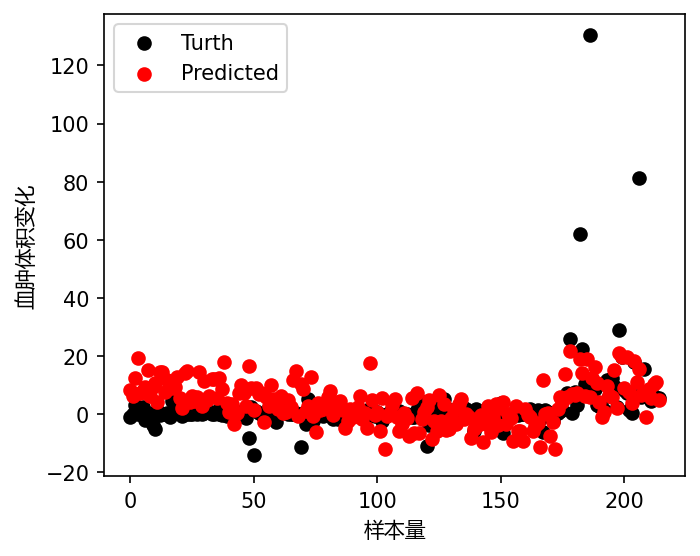

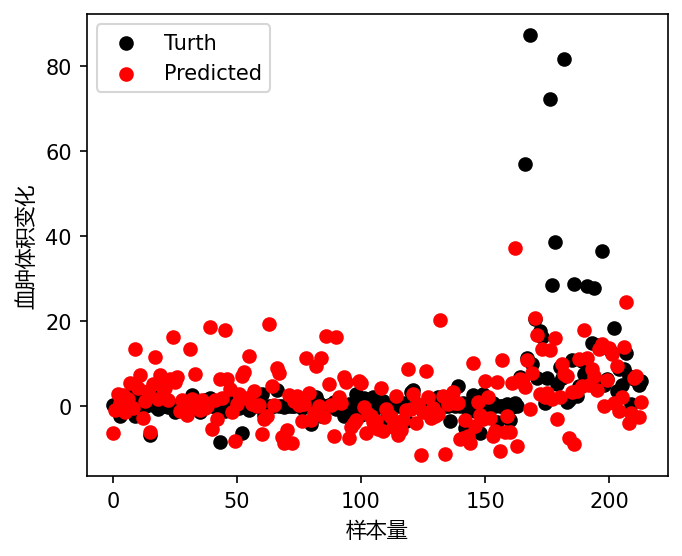

In [ ]:
# @title Linear regression

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font_path = '/content/msyh.ttc'  # the location of the font file
my_font = fm.FontProperties(fname=font_path)  # get the font based on the font_path

# trainf=trainnoage
# trainf=datanocon
# trainf=trainnoload
# trainf=newtrain
trainf=data_final.to_numpy()
# trainf=datamult
# trainf=trainnoload
# trainf=dataallload
label=label2

from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# label= label_encoder.fit_transform(label2)
from sklearn.model_selection import KFold
regr = linear_model.LinearRegression()

kfolds = KFold(n_splits=2, shuffle=True)
for train_idx, test_idx in  kfolds.split(trainf, label):
    y_train, y_test = label[train_idx], label[test_idx]
    X_train = trainf[train_idx]
    X_test = trainf[test_idx]
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    # The coefficients
    print("Coefficients: \n", regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

    # # Plot outputs
    plt.figure(figsize=(5,4), dpi=150)
    plt.scatter(list(range(0, len(y_pred))), y_test, color="black")
    plt.scatter(list(range(0, len(y_pred))), y_pred, color="red")
    # plt.plot(y_test, y_pred, color="blue", linewidth=3)
    plt.xlabel('样本量',fontproperties=my_font)
    plt.ylabel('血肿体积变化',fontproperties=my_font)
    plt.legend(['Turth', 'Predicted'])

    # plt.show()

Mean squared error: 209.25
Coefficient of determination: -0.00
Mean squared error: 77.42
Coefficient of determination: -0.00


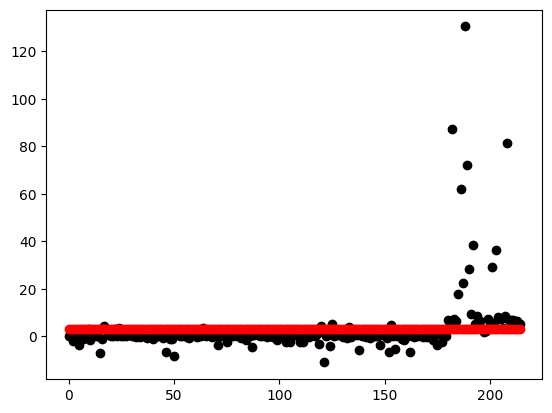

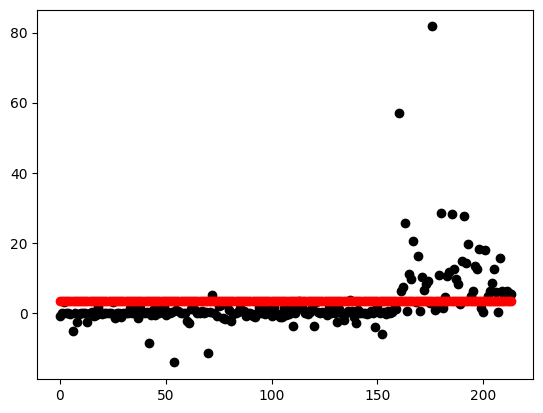

In [ ]:
# @title SVM

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

# trainf=trainnoage
# trainf=datanocon
# trainf=trainnoload
# trainf=newtrain
trainf=data_final.to_numpy()
# trainf=datamult
# trainf=trainnoload
# trainf=dataallload
label=label2

from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# label= label_encoder.fit_transform(label2)
from sklearn.model_selection import KFold
# regr = linear_model.LinearRegression()
regr = svr_rbf

kfolds = KFold(n_splits=2, shuffle=True)
for train_idx, test_idx in  kfolds.split(trainf, label):
    y_train, y_test = label[train_idx], label[test_idx]
    X_train = trainf[train_idx]
    X_test = trainf[test_idx]
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    # The coefficients only avaliable for LR
    # print("Coefficients: \n", regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

    # # Plot outputs
    plt.figure()
    plt.scatter(list(range(0, len(y_pred))), y_test, color="black")
    plt.scatter(list(range(0, len(y_pred))), y_pred, color="red")
    # plt.plot(y_test, y_pred, color="blue", linewidth=3)

    # plt.xticks(())
    # plt.yticks(())

    # plt.show()

Mean squared error: 125.79
Coefficient of determination: 0.16
Mean squared error: 125.20
Coefficient of determination: 0.09


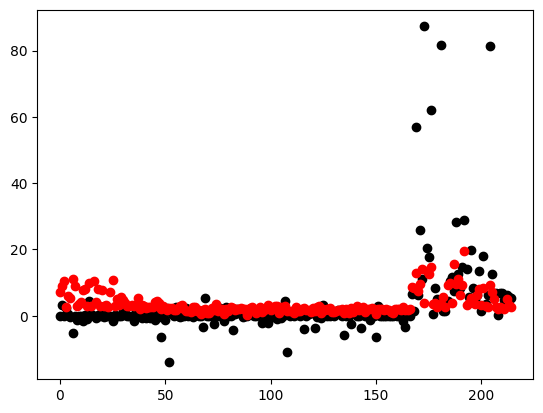

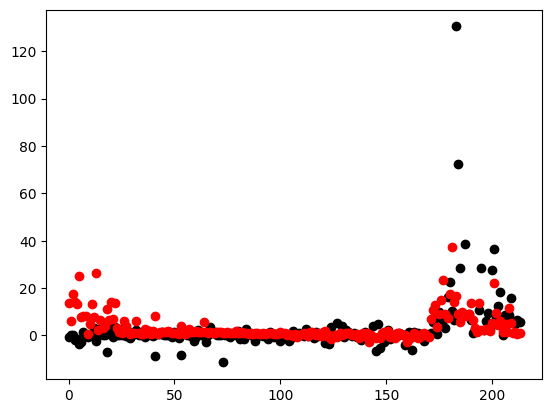

In [ ]:
# @title MLP
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# trainf=trainnoage
# trainf=datanocon
# trainf=trainnoload
# trainf=newtrain
trainf=data_final.to_numpy()
# trainf=datamult
# trainf=trainnoload
# trainf=dataallload
label=label2


from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# label= label_encoder.fit_transform(label2)
from sklearn.model_selection import KFold
# regr = linear_model.LinearRegression()
regr =  MLPRegressor(hidden_layer_sizes=(128,8),random_state=1, max_iter=500)

kfolds = KFold(n_splits=2, shuffle=True)
for train_idx, test_idx in  kfolds.split(trainf, label):
    y_train, y_test = label[train_idx], label[test_idx]
    X_train = trainf[train_idx]
    X_test = trainf[test_idx]
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    # The coefficients only avaliable for LR
    # print("Coefficients: \n", regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

    # # Plot outputs
    plt.figure()
    plt.scatter(list(range(0, len(y_pred))), y_test, color="black")
    plt.scatter(list(range(0, len(y_pred))), y_pred, color="red")
    # plt.plot(y_test, y_pred, color="blue", linewidth=3)

    # plt.xticks(())
    # plt.yticks(())

    # plt.show()

LinearRegression()
34.598909077409736
[-3.61923255e-02 -4.92237694e-01  4.23523528e-02 -7.43458276e-01
 -1.84864703e-02  1.96424944e-02 -2.04543355e+00  2.00665653e+00
  1.62008716e+00 -1.84372327e-01  4.16323927e-01  1.83211284e+00
  1.40824834e+00  1.00180302e-01 -8.67466291e-01 -1.45779972e-01
 -5.01652285e-01  1.13328640e+00 -1.12755874e+00  2.25101855e+00
 -5.09539002e+00 -8.86653596e-01 -4.95630486e+01 -6.89766754e-01
  2.13529297e-02 -2.87807894e-03 -5.46904498e-01 -6.19441725e-02
 -3.13678125e+00 -1.32600697e-01  1.55456192e-01 -9.75356241e-01
  1.10626418e-01]


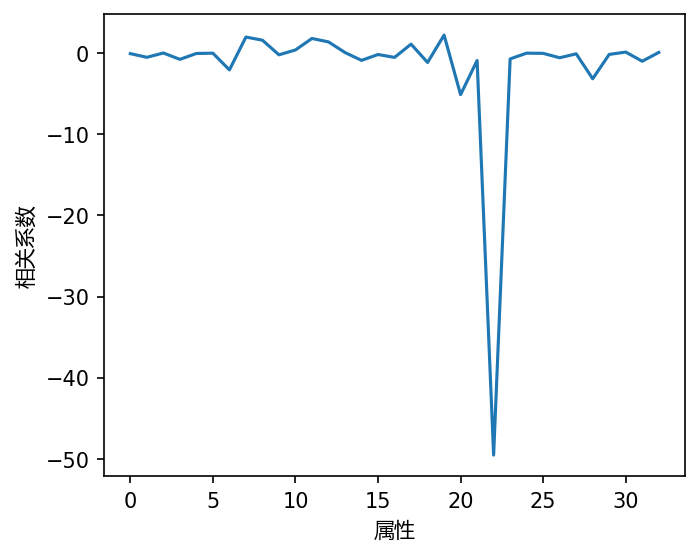

In [ ]:
# @title Check the contribution to the predition accuray
from sklearn.model_selection import train_test_split #这里是引用了交叉验证
from sklearn.linear_model import LinearRegression  #线性回归
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font_path = '/content/msyh.ttc'  # the location of the font file
my_font = fm.FontProperties(fname=font_path)  # get the font based on the font_path


linreg = LinearRegression()
model=linreg.fit(trainf, label)
print (model)
    # 训练后模型截距
print(linreg.intercept_)
    # 训练后模型权重（特征个数无变化）round(
print(linreg.coef_)
plt.figure(figsize=(5,4), dpi=150)
plt.xlabel('属性',fontproperties=my_font)
plt.ylabel('相关系数',fontproperties=my_font)

plt.plot(linreg.coef_)

In [ ]:
feature_cols = ['患者编号',
 '性别',
 '年龄(year)',
 '入院GCS',
 '入院SBP(mmHg)',
 '入院DBP(mmHg)',
 '吸烟史',
 '饮酒史',
 '既往脑梗死',
 '既往脑出血',
 '高血压病史',
 '糖尿病史',
 '血肿部位',
 '首次血肿体积(ml)',
 '合并脑室出血',
 '起病至首次CT时间(hour)',
 '起病至第二次CT时间(hour)',
 'WBC(x109/L)',
 'NEU(x109/L)',
 'LYM(x109/L)',
 'MON(x109/L)',
 'EOS(x109/L)',
 'BAS(x109/L)',
 'RBC(x1012/L)',
 'Hb(g/L)',
 'PLT(x109/L)',
 'MPV(fL)',
 'RDW-SD(fL)',
 'HDL(mmol/L)',
 'PT(s)',
 'APTT(s)',
 'INR',
 '初次空腹血糖(mmol/L)']

B=list(zip(feature_cols,linreg.coef_))
print(B)

[('患者编号', -0.03619232551871524), ('性别', -0.49223769421569463), ('年龄(year)', 0.04235235281076453), ('入院GCS', -0.7434582758541317), ('入院SBP(mmHg)', -0.018486470264774634), ('入院DBP(mmHg)', 0.019642494375447198), ('吸烟史', -2.0454335498673273), ('饮酒史', 2.006656530213173), ('既往脑梗死', 1.6200871552918439), ('既往脑出血', -0.1843723272665706), ('高血压病史', 0.41632392669564766), ('糖尿病史', 1.8321128420671466), ('血肿部位', 1.408248335887938), ('首次血肿体积(ml)', 0.10018030206508655), ('合并脑室出血', -0.86746629056121), ('起病至首次CT时间(hour)', -0.14577997214597693), ('起病至第二次CT时间(hour)', -0.501652284872603), ('WBC(x109/L)', 1.1332864004471295), ('NEU(x109/L)', -1.1275587440073251), ('LYM(x109/L)', 2.251018549877629), ('MON(x109/L)', -5.0953900233262495), ('EOS(x109/L)', -0.8866535963786755), ('BAS(x109/L)', -49.56304863316316), ('RBC(x1012/L)', -0.6897667540402005), ('Hb(g/L)', 0.02135292969242299), ('PLT(x109/L)', -0.002878078943523224), ('MPV(fL)', -0.5469044982406803), ('RDW-SD(fL)', -0.061944172540515534), ('HDL(mmol/L)', 

['患者编号',
 '性别',
 '年龄(year)',
 '入院GCS',
 '入院SBP(mmHg)',
 '入院DBP(mmHg)',
 '吸烟史',
 '饮酒史',
 '既往脑梗死',
 '既往脑出血',
 '高血压病史',
 '糖尿病史',
 '血肿部位',
 '首次血肿体积(ml)',
 '合并脑室出血',
 '起病至首次CT时间(hour)',
 '起病至第二次CT时间(hour)',
 'WBC(x109/L)',
 'NEU(x109/L)',
 'LYM(x109/L)',
 'MON(x109/L)',
 'EOS(x109/L)',
 'BAS(x109/L)',
 'RBC(x1012/L)',
 'Hb(g/L)',
 'PLT(x109/L)',
 'MPV(fL)',
 'RDW-SD(fL)',
 'HDL(mmol/L)',
 'PT(s)',
 'APTT(s)',
 'INR',
 '初次空腹血糖(mmol/L)']

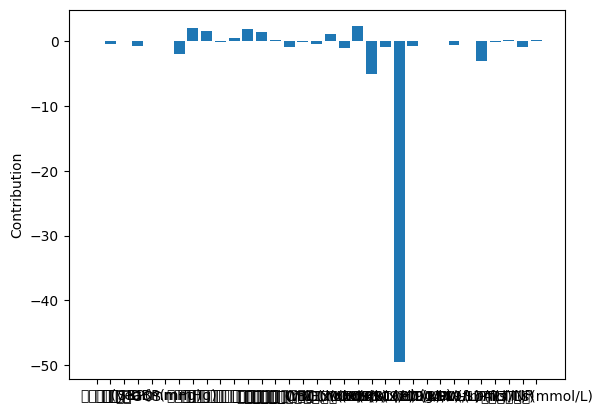

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = list(data_final)
counts = linreg.coef_


ax.bar(fruits, counts)

ax.set_ylabel('Contribution')

plt.show()